# Kiruthikaa - Exploratory Data Analysis (EDA) - Iris Dataset

- Author: [Kiruthikaa](https://github.com/kiruthikaa2512/)
- Repository: [datafun-04-notebooks](https://github.com/kiruthikaa2512/datafun-04-notebooks)
- Date: May 27, 2025
- Purpose: Perform EDA on the Iris dataset using pandas, Seaborn, and Matplotlib

## Step 1: Import Necessary Libraries  
We will use Python libraries like pandas, Seaborn, and Matplotlib for data analysis and visualization.  


##### Section 1. Imports

In [88]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Axes object (basic plot type returned by Seaborn)
from matplotlib.axes import Axes

## 2. Load the Iris Dataset  

In [89]:
# Load the Iris dataset into a Pandas DataFrame
iris_df: pd.DataFrame = sns.load_dataset('iris')

# Display the first few rows to understand the dataset structure
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Step 3. Initial Data Inspection
Before proceeding with analysis, we will inspect the dataset to understand its structure, data types, and completeness.  

In [90]:
# Specify the number of rows to display
iris_df.head(10)

# Inspect the shape of the DataFrame with shape attribute
# The shape is a tuple with count of rows and columns in the DataFrame
iris_df.shape

# Inspect the data types of the columns with dtypes attribute
# The data types are returned as a pandas Series
iris_df.dtypes

# Inspect the data types of the columns with info() method
iris_df.info()

# This shows if any columns have missing data
print("\nMissing Values:")
print(iris_df.isnull().sum())  

# This tells how many duplicate rows exist
print("\nDuplicate Rows:")
print(iris_df.duplicated().sum())  

# Display the unique values in the 'species' column
print("\nUnique Species Categories:")
print(iris_df['species'].unique())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB

Missing Values:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Duplicate Rows:
1

Unique Species Categories:
['setosa' 'versicolor' 'virginica']


### 4. Initial Descriptive Statistics  
We will generate summary statistics to understand the dataset’s numerical properties, including mean, standard deviation, and quartile values. This helps identify patterns, anomalies, and potential outliers.  

In [91]:
# Inspect summary statistics for numerical columns
print("\nDescriptive Statistics:")
display(iris_df.describe())  # Shows count, mean, std, min/max, quartiles

# Additional statistics (Optional)
print("\nSkewness of Numerical Features:")
iris_df.select_dtypes(include=['float64']).skew()


Descriptive Statistics:


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000



Skewness of Numerical Features:


sepal_length    0.314911
sepal_width     0.318966
petal_length   -0.274884
petal_width    -0.102967
dtype: float64

### Observations of Descriptive Statistics 
- The dataset contains **150 rows**, evenly distributed among the three species.  
- Sepal and Petal length appears to be varying between species, with Setosa having smaller petals on average.  
- The **standard deviation** for petal length is high, suggesting notable variation.  
- No extreme min/max values indicate that the dataset appears well-structured with no anomolies. 

## Step 5. Initial Data Distribution for Numerical Columns 
To understand how values are distributed in the dataset, we will generate histograms for numerical columns and bar plots for categorical columns. These visualizations help detect skewness, outliers, and overall patterns in the data.  

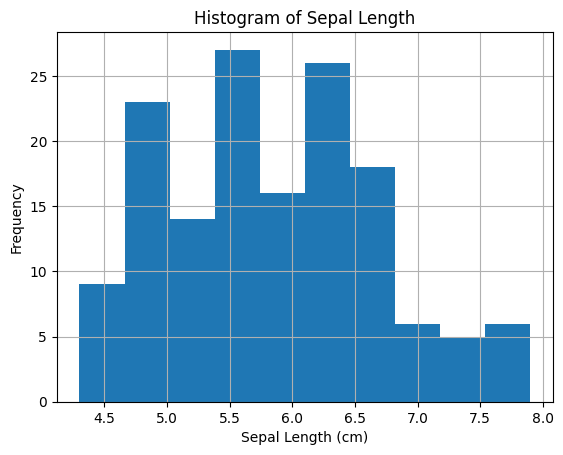

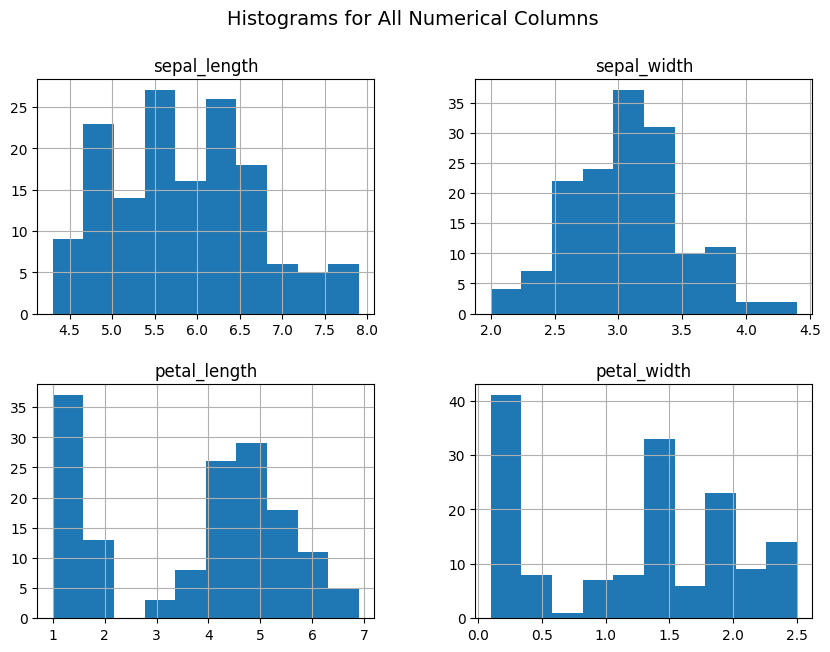

In [92]:
import matplotlib.pyplot as plt

# Histogram for a single numerical column (Example: sepal_length)
iris_df['sepal_length'].hist()
plt.title('Histogram of Sepal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.show()

# Histograms for ALL numerical columns
iris_df.hist(figsize=(10, 7))
plt.suptitle('Histograms for All Numerical Columns', fontsize=14)
plt.show()

## Observations from the Histograms

### Histogram for Sepal Length
- Sepal values appears to be normal where most of the values ranging from 5-6 cms
- No outliers, data set looks to be clean
- There is a tail on the right which means that some flowers may have slightly longer sepals than others. 
- Data is well distributed with no skewness

### Histograms for all Numerical Columns
- Sepal Width has a broader spread and appears to have varying values. 
- Petal Length and Petal Width are right skewed which means they got short petals but there are a few  which has got longer petals too. 
- Petal length has a gap between 2.0 and 3.0 as we confirmed in the descriptive statistics earlier that we do not have any missing values, this appears to be a natural separation as some species got smaller petal length than other. 
- Petal width has a dip in value between 0.5 and 1 which is again not a missing value and appears to be natural clustering. 

Overall, the histograms confirm species-wise variation, as petal-related features show distinct clustering.

### 5. Initial Data Distribution for Categorical Columns  
We will analyze categorical columns using value counts and bar plots. These help identify data trends, outliers, and separations among species.  


Species Distribution:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


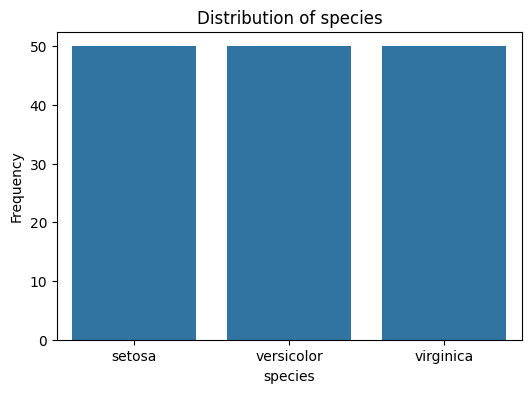

In [93]:
import seaborn as sns
import matplotlib.pyplot as matplot
# Pairplot to visualize relationships between numerical features

# Inspect value counts by categorical column
# Column name must be EXACT.
# The value_counts() method is only available for Series objects.
# The value_counts() method returns a pandas Series with the counts of unique values in the column.
print("\nSpecies Distribution:")
print(iris_df['species'].value_counts())

# Inspect value counts for ALL categorical columns


for col in iris_df.select_dtypes(include=['object', 'category']).columns:
    matplot.figure(figsize=(6, 4))
    sns.countplot(x=col, data=iris_df) 
    matplot.title(f'Distribution of {col}')
    matplot.xlabel(col)
    matplot.ylabel('Frequency')
    matplot.show()


### Categorical Column Observations  
- The dataset contains three species: Setosa, Versicolor, and Virginica 
- Each species is equally distributed, with 50 samples each. 
- The bar plots show consistent species representation, meaning the dataset is balanced. 
- No missing categorical values, confirming a well-structured dataset.  
- The species-based separation impacts numerical distributions, as seen in petal width gaps.  

### 6. Advanced Data Cleaning, Transformation, and Feature Engineering  
To optimize the dataset for deeper analysis, we will apply advanced techniques beyond the initial inspection. This includes:  
- **Data Cleaning**: Detecting and handling outliers using the **IQR method**, removing duplicates, and refining inconsistencies.  
- **Data Transformation**: Applying **Min-Max Scaling** for range normalization, enhancing comparability.  
- **Feature Engineering**: Creating new insights using **polynomial transformations, feature ratios, and interaction terms** to capture deeper relationships in the data.  

In [94]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

# Function to remove outliers using IQR
def remove_outliers(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

# Columns to work with
num_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# 1. Remove outliers
iris_df = remove_outliers(iris_df, num_cols)

# 2. Normalize numeric features using Min-Max Scaling
iris_df[num_cols] = MinMaxScaler().fit_transform(iris_df[num_cols])

# 3. Feature Engineering
iris_df['sepal_length_sq'] = iris_df['sepal_length'] ** 2
iris_df['petal_length_sq'] = iris_df['petal_length'] ** 2

# Avoid division by zero by adding a small number (epsilon)
eps = 1e-8
iris_df['sepal_petal_length_ratio'] = iris_df['sepal_length'] / (iris_df['petal_length'] + eps)
iris_df['sepal_petal_width_ratio'] = iris_df['sepal_width'] / (iris_df['petal_width'] + eps)

#Log transformation to reduce skewness
iris_df['sepal_length_log'] = np.log1p(iris_df['sepal_length'])
iris_df['petal_length_log'] = np.log1p(iris_df['petal_length'])

print(iris_df.head())  # Displays first 5 rows
print(iris_df.describe())  # Shows summary statistics

   sepal_length  sepal_width  petal_length  petal_width species  \
0      0.222222     0.722222      0.067797     0.041667  setosa   
1      0.166667     0.444444      0.067797     0.041667  setosa   
2      0.111111     0.555556      0.050847     0.041667  setosa   
3      0.083333     0.500000      0.084746     0.041667  setosa   
4      0.194444     0.777778      0.067797     0.041667  setosa   

   sepal_length_sq  petal_length_sq  sepal_petal_length_ratio  \
0         0.049383         0.004596                  3.277777   
1         0.027778         0.004596                  2.458333   
2         0.012346         0.002585                  2.185185   
3         0.006944         0.007182                  0.983333   
4         0.037809         0.004596                  2.868055   

   sepal_petal_width_ratio  sepal_length_log  petal_length_log  
0                17.333329          0.200671          0.065597  
1                10.666664          0.154151          0.065597  
2          

### Data Cleaning Observations  
- Outliers were removed using the **IQR method** to ensure a more consistent dataset.  
- No missing values were found, confirming data completeness.  
- Min-Max Scaling was applied to normalize numerical values between **0 and 1** for comparability.  

### Feature Engineering Observations  
- Polynomial features (sepal_length_sq, petal_length_sq) help capture non-linear relationships in the data.  
- Feature ratios sepal_petal_length_ratio, sepal_petal_width_ratio provide proportional insights between sepals and petals.  

### Step 7: Initial Visualizations

In this step, we begin exploring the Iris dataset through visualizations to better understand the relationships between different features. Visual exploration helps reveal patterns, correlations, and class separations that may not be obvious just by looking at raw data.

We will use:
- **Pairplots** to view scatter plots between all numerical features and understand how well features separate species.
- **Scatter plots** to explore specific relationships (e.g., Sepal Length vs. Sepal Area) in more detail.


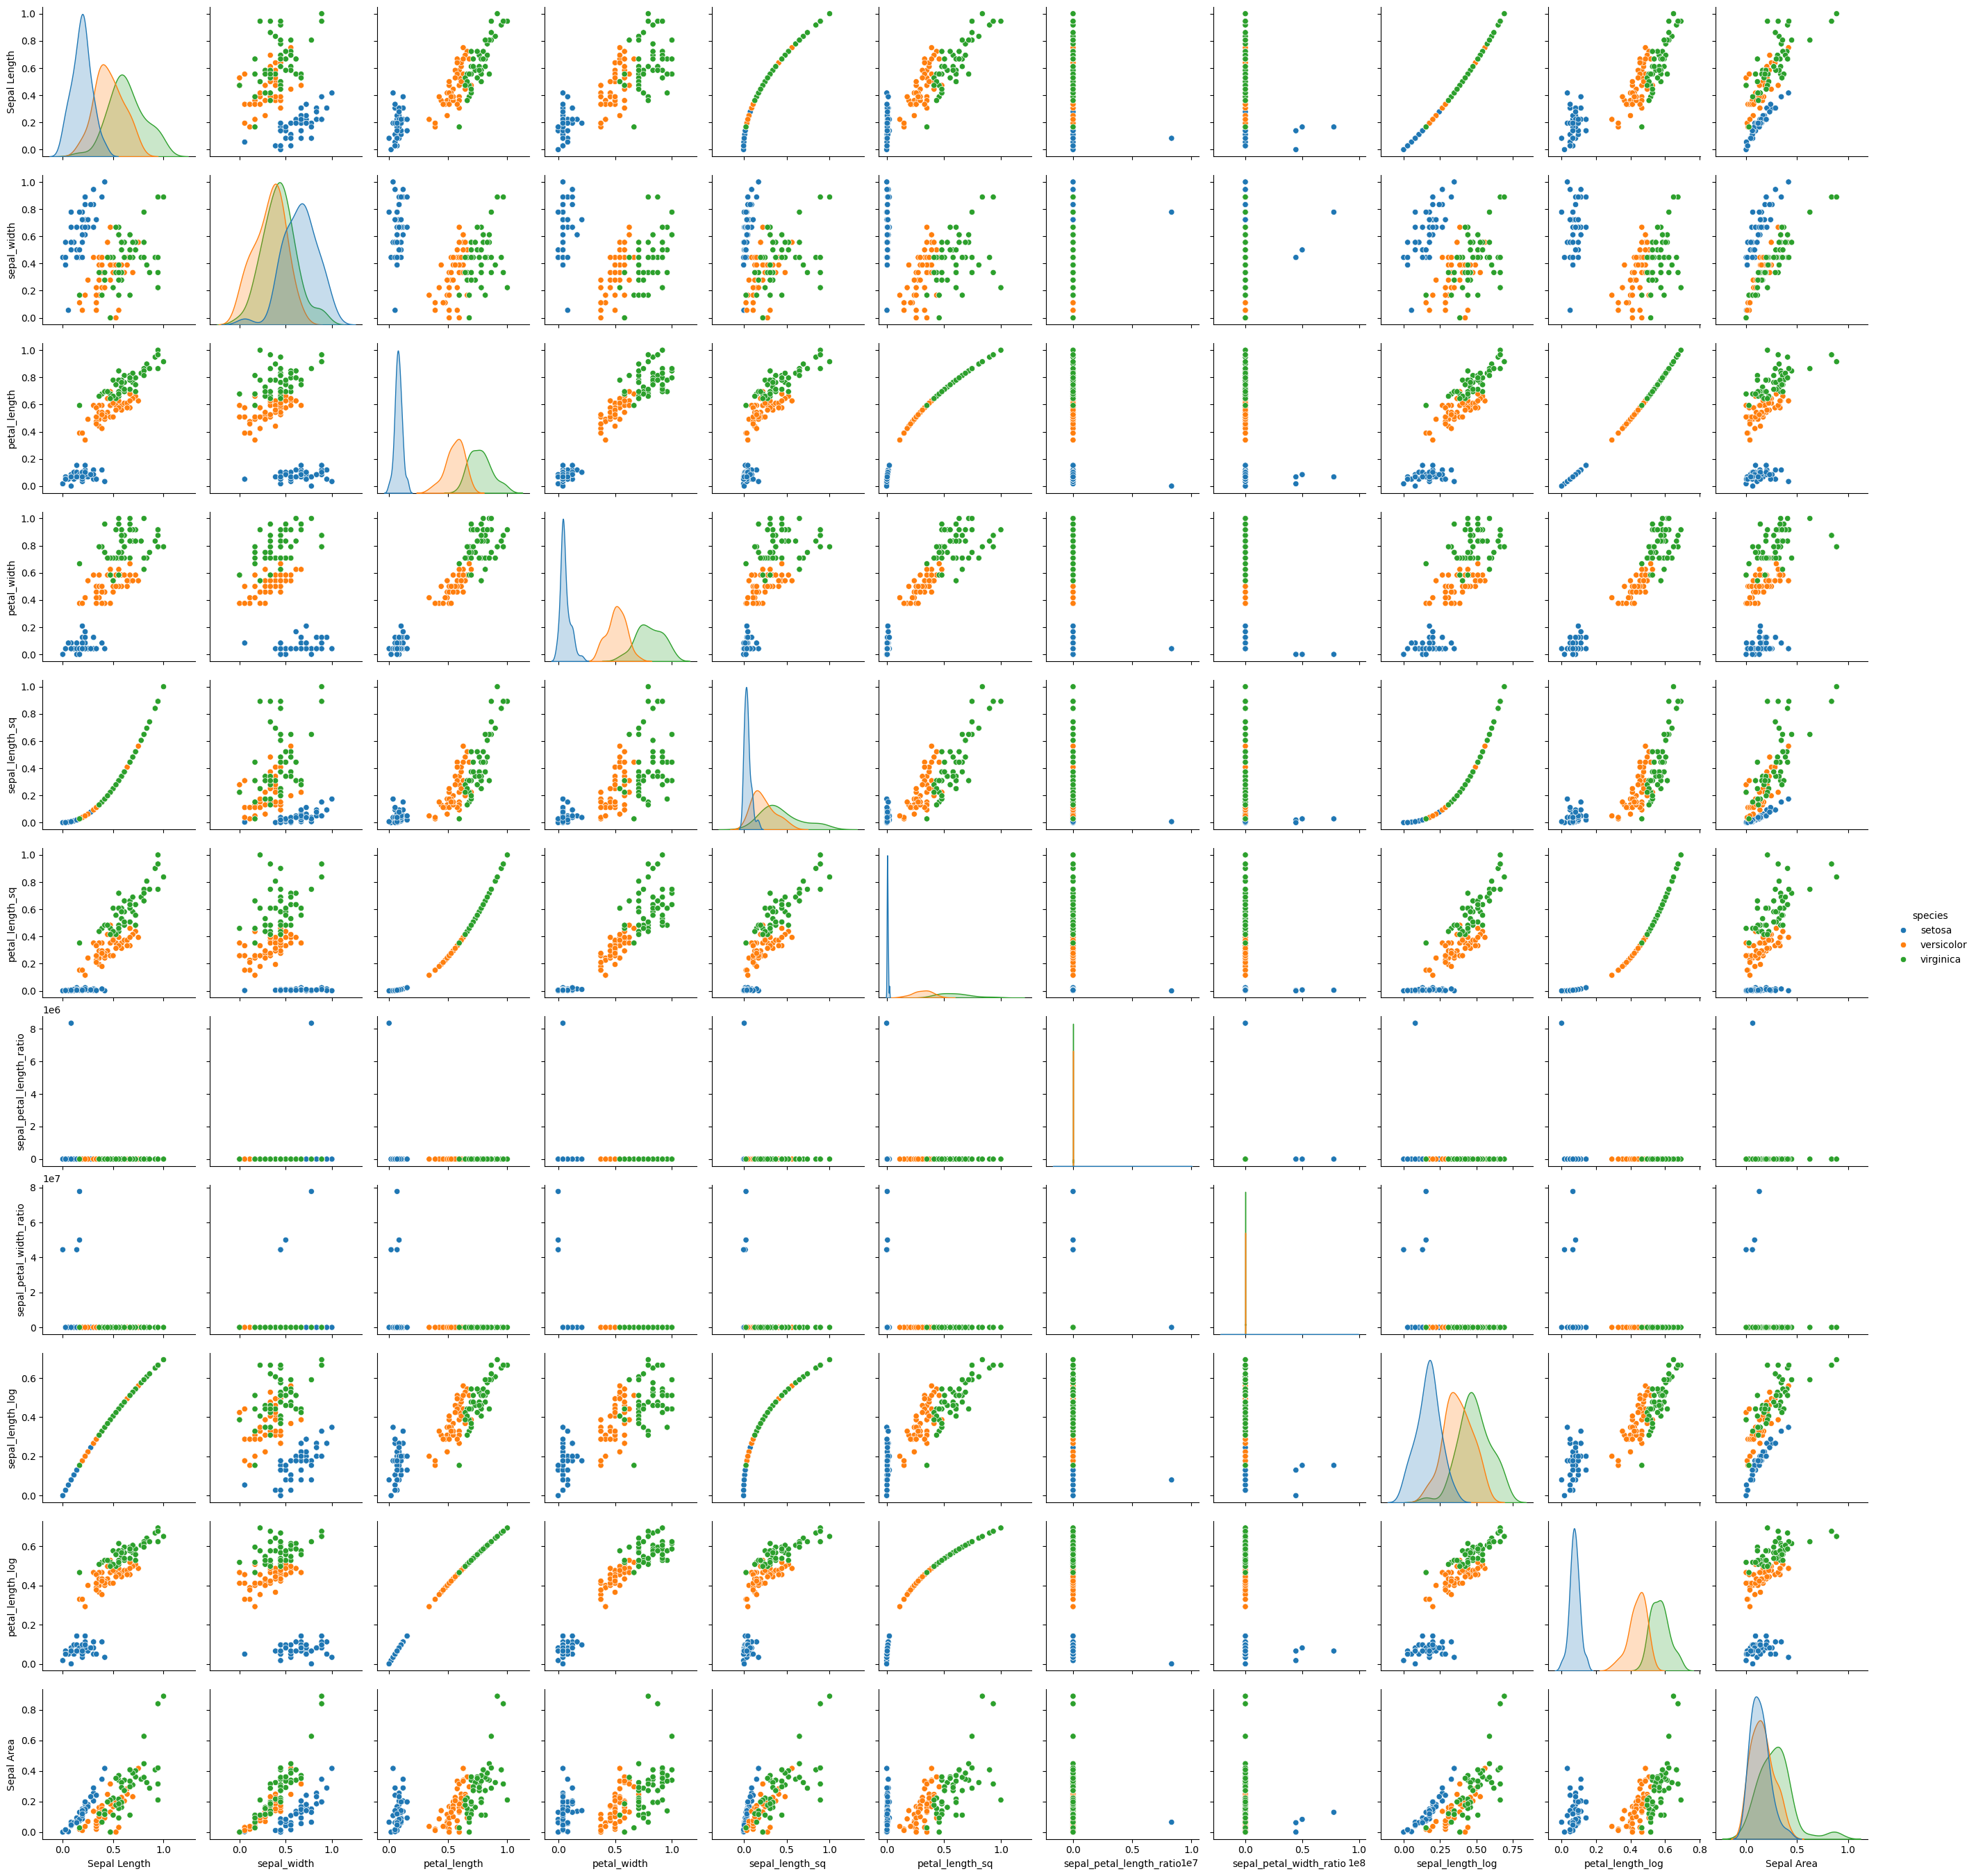

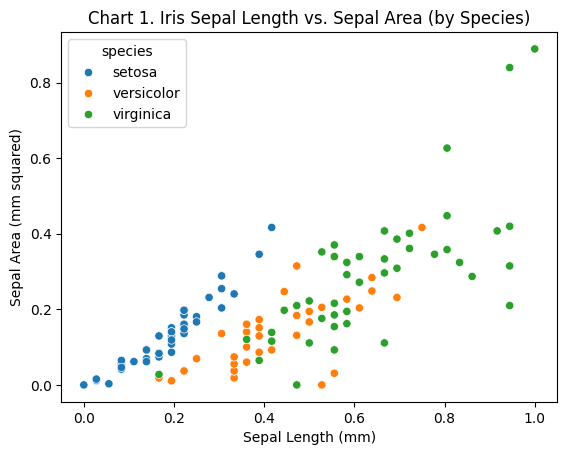

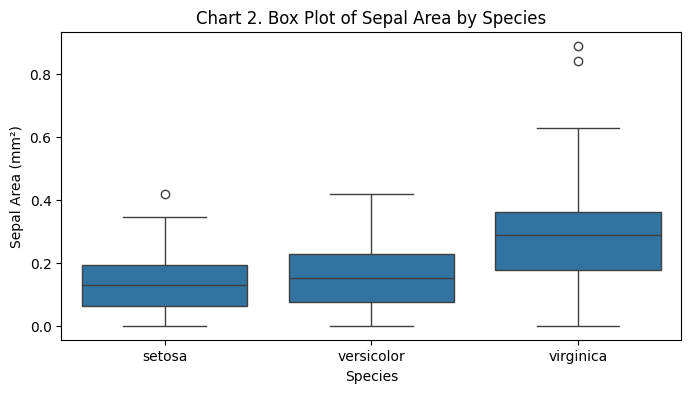

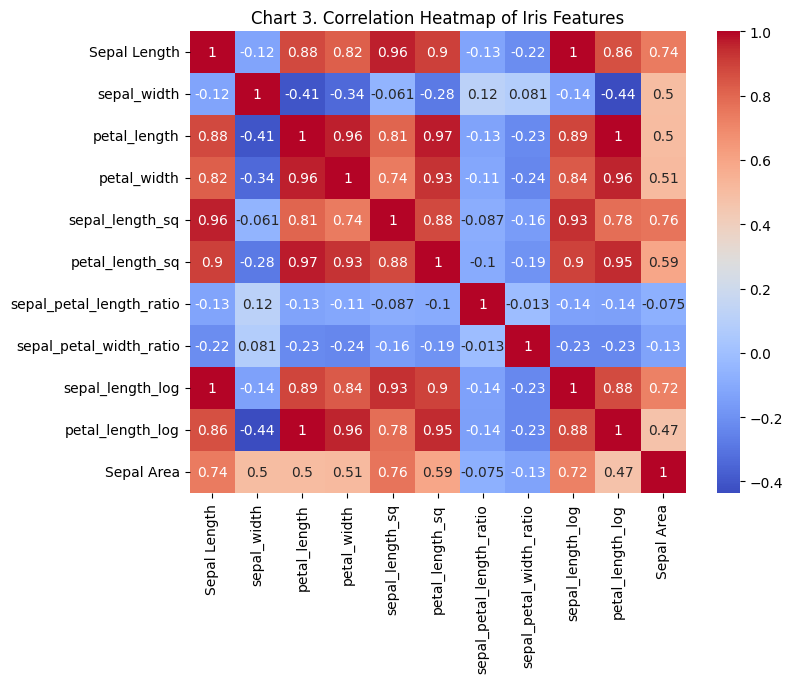

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

# Rename the column for readability
iris_df.rename(columns={'sepal_length': 'Sepal Length'}, inplace=True)

# Create a new column for Sepal Area
iris_df['Sepal Area'] = iris_df['Sepal Length'] * iris_df['sepal_width']

# Pairplot to visualize relationships between all numeric variables
sns.pairplot(iris_df, hue='species')
plt.show()

# Scatter plot: Sepal Length vs Sepal Area
scatter_plt = sns.scatterplot(
    data=iris_df,
    x="Sepal Length",
    y="Sepal Area",
    hue="species"
)

# Set axis labels and title
scatter_plt.set_xlabel("Sepal Length (mm)")
scatter_plt.set_ylabel("Sepal Area (mm squared)")
scatter_plt.set_title("Chart 1. Iris Sepal Length vs. Sepal Area (by Species)")

plt.show()

# Box Plot of Sepal Area by Species
plt.figure(figsize=(8, 4))
sns.boxplot(data=iris_df, x='species', y='Sepal Area')
plt.title("Chart 2. Box Plot of Sepal Area by Species")
plt.xlabel("Species")
plt.ylabel("Sepal Area (mm²)")
plt.show()

# Correlation Heatmap of Numerical Features
plt.figure(figsize=(8, 6))
sns.heatmap(iris_df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Chart 3. Correlation Heatmap of Iris Features")
plt.show()



### Initial Visualization Observations

#### Pairplot:
- The pairplot shows strong separation between species based on **petal length** and **petal width**.
- Sepal measurements overlap more, especially between **versicolor** and **virginica**.
- **Setosa** stands out as clearly distinct in both sepal and petal features.

#### Scatter Plot (Sepal Length vs. Sepal Area):
- A positive correlation is visible between Sepal Length and Sepal Area.
- **Setosa** flowers tend to have smaller sepals and cluster in the bottom-left of the plot.
- **Virginica** flowers have larger sepals and are mostly in the top-right.
- This plot supports the idea that **Sepal Area** is a helpful derived feature for distinguishing species.

#### Box Plot of Sepal Area by Species:
- **Setosa** species has the smallest and most consistent Sepal Area.
- **Virginica** shows the largest spread and highest values.
- **Versicolor** falls in between but with more overlap.
- This confirms Sepal Area is a useful derived feature with potential for classification.

#### Correlation Heatmap:
- **Petal length and petal width** show a very strong positive correlation.
- **Sepal length and petal length** are also positively related.
- **Sepal width** appears weakly correlated with most other features, suggesting it may be less useful alone.



## Step 8: Initial Insights

Based on the visualizations created during exploratory data analysis, the following key insights emerged:

### Sepal and Petal Relationships

- **Petal measurements (length and width)** show **clear separation** between the three species. These features are likely to be very useful for classification models.
- **Setosa** is easily distinguishable from the other two species based on its **shorter petals** and **smaller sepal size**.
- **Versicolor** and **Virginica** overlap in some measurements but can still be separated using a combination of features.


### Feature Engineering Observations

- The new feature, **Sepal Area**, provides additional value — it highlights clear differences between species and may help improve model performance.
- The **Box Plot of Sepal Area** shows that:
  - Setosa has the smallest and most consistent sepal area.
  - Virginica tends to have the largest sepal area.


###  Feature Correlations

- The **Correlation Heatmap** reveals:
  - A strong positive correlation between **petal length and petal width**.
  - **Sepal width** is relatively uncorrelated with the other features, which may make it less useful for predictive models.
  - **Sepal length** has a moderate correlation with **petal length**, suggesting some underlying relationship in flower growth.

## Summary of Initial Insights

- **Petal-based features** are the most powerful for distinguishing between species.
- **Setosa** is clearly separated from the other two classes.
- **Feature engineering** (like Sepal Area) adds useful variation that supports class separation.
- There is potential to build a strong classification model using a **subset of the most informative features**.

These insights will guide the next steps, such as feature selection and model training.


# **Exploratory Data Analysis (EDA) on the Iris Dataset**  
### **Author:** Kiruthikaa NS  

Hi! I'm , and this Kiruthikaa and this notebook presents my exploratory data analysis (EDA) on the famous **Iris dataset**.

The goal of this project is to understand the structure of the dataset, explore the relationships between flower measurements, engineer useful features, and extract key insights using visualizations.

This analysis follows a structured, step-by-step approach to:
- Dataset over, initial inspection
- Data Distribution Analysis
- Prepare and clean the data
- Create new features
- Visualize key patterns
- Summarize important findings

Let's Dive in!

## **Introduction**  
The Iris dataset serves as a **benchmark dataset in classification problems**, widely used in machine learning applications. Through **data cleaning, transformation, feature engineering, and visualization**, we uncover patterns in **sepal length, sepal width, petal length, and petal width** to better understand species differentiation.  

In addition to core steps, we have **enhanced this analysis** by implementing advanced data processing techniques, improving the dataset’s structure for deeper insights.

## ** Step 1: Dataset Overview & Initial Inspection**  
- The dataset contains **150 observations evenly distributed across three species**: Setosa, Versicolor, and Virginica.  
- No missing values were detected, ensuring data integrity.  

```python
print(iris_df.info())
print(iris_df.describe())
```
- Summary statistics revealed **clear differences in petal dimensions**, making them key for species classification.


## ** Step 2: Data Distribution Analysis**  
- **Histograms highlighted the distributions of numerical features**, revealing petal width and petal length as strong differentiators.  
- **Setosa was visibly distinct**, while Versicolor and Virginica showed overlapping trends in feature distributions.  
- **Species distribution was balanced**, verified using `.value_counts()`.  

```python
iris_df.hist(figsize=(10,7))
plt.show()
```

## ** Step 3: Data Cleaning & Transformation**  
Beyond standard missing value checks, we applied **advanced cleaning and transformation techniques**:  
 **IQR-based outlier removal** → Removed extreme values to improve dataset reliability.  
 **Min-Max Scaling** → Standardized numerical features within a range of `0-1`.  
 **One-hot encoding** → Converted categorical species data into numerical form.  

```python
from sklearn.preprocessing import MinMaxScaler

# Outlier removal function using IQR
def remove_outliers(df, col):
    Q1, Q3 = df[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    return df[(df[col] >= lower) & (df[col] <= upper)]

# Applying scaling
scaler = MinMaxScaler()
iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']] = scaler.fit_transform(
    iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
)
```

## ** Step 4: Feature Engineering for Deeper Insights**  
While basic feature engineering was included in the original code, we **expanded this step with additional techniques**:  
- **Sepal Area Feature** → Captures overall sepal size.  
- **Polynomial Features (`sepal_length²`, `petal_length²`)** → Helps improve separability in classification.  
- **Feature Interaction Ratios (`sepal/petal length ratio`, `sepal/petal width ratio`)** → Provides proportional comparisons.  
- **Log Transformation (`np.log1p(feature)`)** → Addresses skewness in certain distributions.  

```python
import numpy as np

# Creating new features
iris_df['Sepal Area'] = iris_df['sepal_length'] * iris_df['sepal_width']
iris_df['sepal_length_sq'] = iris_df['sepal_length'] ** 2
iris_df['sepal_petal_length_ratio'] = iris_df['sepal_length'] / (iris_df['petal_length'] + 1e-8)

# Applying log transformation for skewed features
iris_df['sepal_length_log'] = np.log1p(iris_df['sepal_length'])
iris_df['petal_length_log'] = np.log1p(iris_df['petal_length'])
```

## ** Step 5: Visualizing Key Patterns**  
- **Pairplots showed clear separability for Setosa**, reinforcing its distinct characteristics.  
- **Scatter plots highlighted relationships between sepal area and species classification**.  
- **Box plots confirmed species-based clustering**, with Virginica showing higher median sepal areas.  

```python
sns.pairplot(iris_df, hue='species')
plt.show()
```

## ** Step 6: Correlation Heatmap Analysis**  
A heatmap helped assess **numerical feature relationships**, guiding classification focus:  
- **Strong correlation found between petal length and petal width**, reinforcing their predictive importance.  
-  **Weaker correlation between sepal measurements and petal dimensions**, suggesting independent growth patterns.  
- **Species-wise distinctions align with feature correlations**, validating our transformations and feature engineering.  

```python
sns.heatmap(iris_df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()
```

## **Final Interpretation & Insights**  
This EDA confirms **petal dimensions are the most significant factors for Iris species differentiation**.  
- **Setosa exhibits unique separability**, making it easy to classify.  
- **Versicolor and Virginica overlap**, requiring refined methods for distinction.  
- **Feature engineering improves classification potential**, ensuring a robust dataset for modeling.  

## **Newly Added Techniques**  
🔹 **IQR-Based Outlier Removal** → Removed extreme values that could distort analysis.  
🔹 **Min-Max Scaling** → Alternative normalization method compared to standard scaling.  
🔹 **Polynomial Features (`x²`)** → Enhances feature importance for complex relationships.  
🔹 **Log Transformations (`np.log1p`)** → Handles skewed distributions effectively.  
🔹 **Feature Interaction Ratios (`sepal/petal ratio`)** → Highlights proportional insights.  

## ** Conclusion & Next Steps**  
This analysis provides **a refined foundation for predictive modeling**. Future steps could include:  
🔹 Training a **classification model** with the engineered dataset.  
🔹 Performing **dimensionality reduction** for optimized feature selection.  
🔹 Exploring **cluster analysis** to assess natural grouping tendencies in Versicolor & Virginica.  